In [1]:
import os
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

Блок производных

In [2]:
def derivative(csv, y='Q', x='E_min'):
    deriv1 = csv[y].diff()/ csv[x].diff()
    mid_der =(deriv1[1:-1].values+deriv1[2:].values)/2
    mid_der = pd.Series(mid_der)
    dy = pd.concat([deriv1[1:2], mid_der, deriv1[-1:]], ignore_index=True)
    dy.name = 'd'+x
    return pd.concat([csv[x].reset_index(drop=True), dy], axis=1)

In [67]:
filedir = r'D:\!Science\Analysis\Electrochem\Nissan\2023 12 20 additional experiments\DVA processing'
files = []
[files.extend([os.path.join(i[0], k) for k in i[2]]) for i in os.walk(filedir)]
files = [i for i in files if '.csv' in i]
files = [i for i in files if '_apr' in i]
files = [i for i in files if 'G58' in i]
files

['D:\\!Science\\Analysis\\Electrochem\\Nissan\\2023 12 20 additional experiments\\DVA processing\\3.2\\G58 OCV 3.2 polynom2_apr.csv',
 'D:\\!Science\\Analysis\\Electrochem\\Nissan\\2023 12 20 additional experiments\\DVA processing\\3.2\\G58 OCV 3.2 polynom2_apr_diff.csv',
 'D:\\!Science\\Analysis\\Electrochem\\Nissan\\2023 12 20 additional experiments\\DVA processing\\3.3\\G58  OCV 3.3 init or exp3 not finished_apr.csv']

In [68]:

filepath = files[2]
# filepath = os.path.join(filedir,'3.2', filename)
csv = pd.read_csv(filepath, )
csv= csv.drop(labels=['Unnamed: 0'], axis=1)


[<Axes: xlabel='E_min'>,
 <Axes: xlabel='Exp1'>,
 <Axes: xlabel='Exp2'>,
 <Axes: xlabel='Exp3'>,
 <Axes: xlabel='Exp_pol'>]

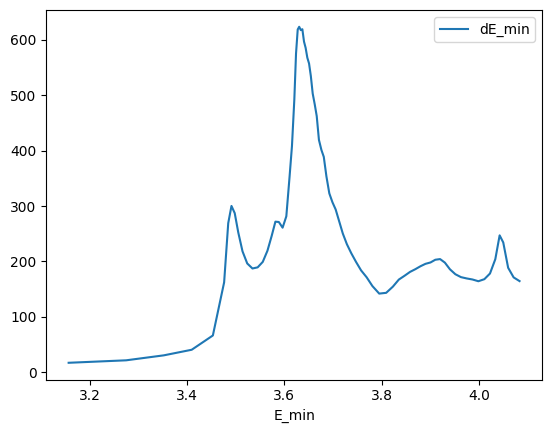

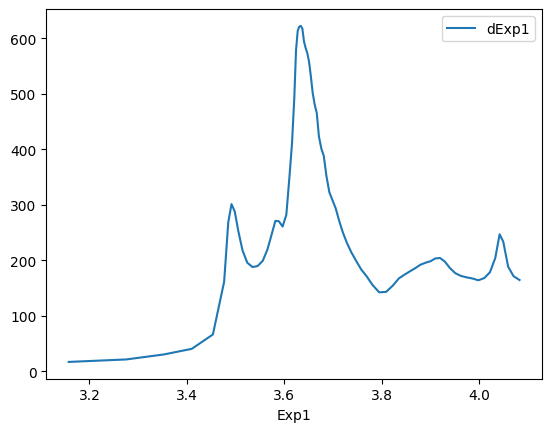

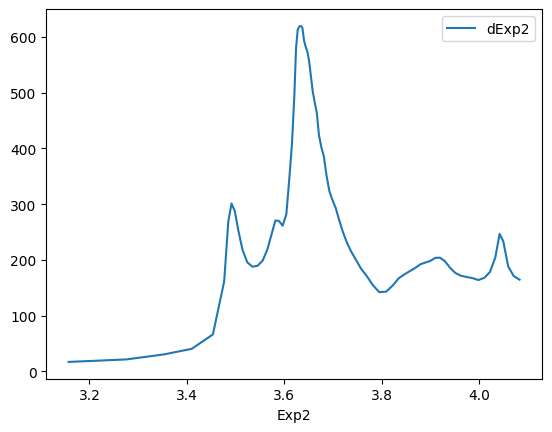

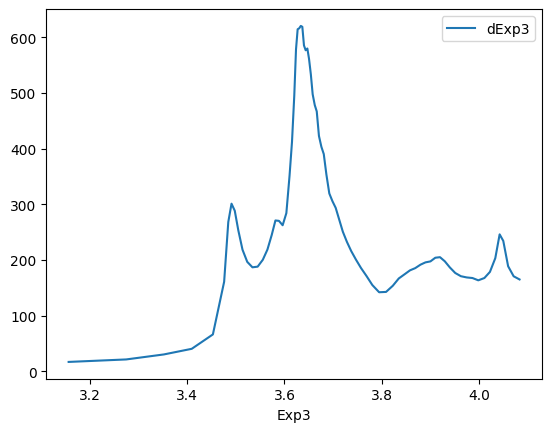

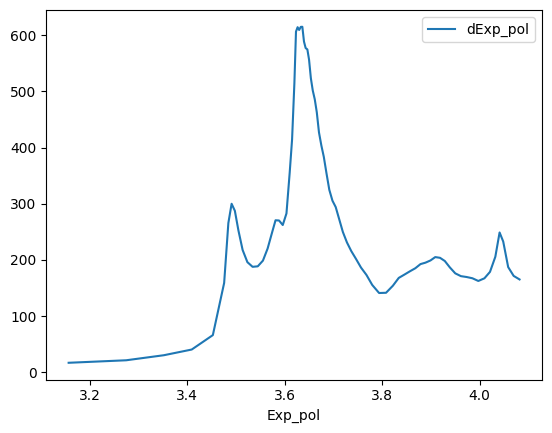

In [71]:
[derivative(csv.loc[::2], x=col).plot(x=col) for col in csv.columns[1:]]

In [72]:
deriv_csv= pd.concat([derivative(csv.loc[::2], x=col) for col in csv.columns[1:]], axis=1)

In [73]:
filepath

'D:\\!Science\\Analysis\\Electrochem\\Nissan\\2023 12 20 additional experiments\\DVA processing\\3.3\\G58  OCV 3.3 init or exp3 not finished_apr.csv'

In [74]:
sp = filepath.split('.')
sp[-2] += '_diff'
savepath='.'.join(sp)
deriv_csv.to_csv(savepath, index=False)

In [19]:
deriv_csv

,E_min,dE_min,Exp1,dExp1,Exp2,dExp2,Exp3,dExp3,Exp_pol,dExp_pol
0,3.321421,19.912067,3.322542,19.873132,3.321632,19.894483,3.321478,19.937766,3.320280,19.964955
1,3.420792,25.422587,3.422108,25.322141,3.421090,25.380666,3.420721,25.475819,3.419387,25.540047
2,3.484760,42.049026,3.486412,41.751691,3.485195,41.926935,3.484522,42.221772,3.482981,42.732173
3,3.521978,66.388403,3.523936,66.306543,3.522539,66.407181,3.521556,66.752174,3.519388,66.881998
4,3.546835,95.490899,3.548709,95.238859,3.547329,95.141966,3.546270,95.235219,3.544307,94.097833
5,3.564604,121.404655,3.566602,122.335625,3.565244,122.274011,3.564195,121.463947,3.562499,120.185705
6,3.579660,141.540937,3.581362,143.139328,3.580002,142.909064,3.579127,141.950599,3.577537,140.323110
7,3.592709,153.924721,3.594363,154.642193,3.593044,154.547331,3.592200,154.340391,3.590813,152.921116
8,3.605377,159.523732,3.606960,157.840836,3.605618,158.311499,3.604778,156.176941,3.603434,158.025950
9,3.617528,156.577222,3.619437,155.930222,3.618043,156.316344,3.617541,154.037675,3.615858,156.004524
